# Scikit Learn et données

Scikit-learn propose quelques ensembles de données, notamment [iris](http://en.wikipedia.org/wiki/Iris_flower_data_set) et [digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) (classification) et le [boston house prices dataset](http://archive.ics.uci.edu/ml/datasets/Housing) (regression).

Exercice : en trouvez d'autres...

In [3]:
import numpy as np
import scipy as sp
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()
boston = datasets.load_boston()

# Même avant scikit-learn

Les libraries `numpy` et `scipy` ont plein de bonnes choses dedans.  Explorez-les un peu.

# sklearn.datasets

Un dataset ressemble à un `dict`.  Explorez les membres suivants (e.g., `iris.DESCR`) :
* `data`
* `target`
* `feature_names`
* `DESCR`
Puis utilisez ce que vous avez appris dans la module pandas pour explorer les données elles-même.

<img src="petal_sepal_label.png">

En anglais (pour correspondre aux noms des fonctions) : "We fit an estimator to the data to predict the classes to which unseen samples belong".  Donc, un `estimator` implemente les méthode `fit(X, y)` et `predit(T)`.

Le constructeur d'un estimateur accepte les paramètes du modèle.
Il est également possible de changer les paramètes après création.

In [4]:
from sklearn import svm

model = svm.SVC(gamma=0.002, C=100.)
print(model.gamma)
model.set_params(gamma=.001)
print(model.gamma)
model.fit(digits.data[:-1], digits.target[:-1])
model.predict([digits.data[-1]])

0.002
0.001


array([8])

Nous pouvons regarder l'image.

* Qu'est-ce qui est l'effet de `cmap`?

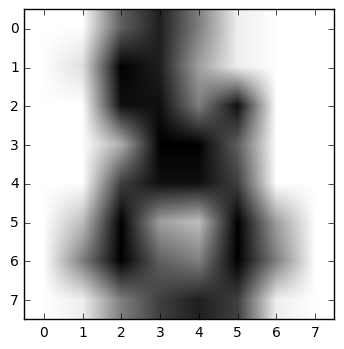

In [5]:
import pylab as pl
%matplotlib inline

pl.imshow(digits.images[-1], cmap=pl.cm.gray_r)

À savoir (mais pour un autre jour) :
* pickle marche
* `sklearn.externals.joblib` est parfois plus efficace

Un estimator prend un ensemble de données, typiquement un array de dimension 2 (`np.ndarray`, cf. `.shape`).

Regardons les iris :
* Il y a combien de classes d'iris?
* Il y a combien de vecteurs dans le training data?
* Il y a combien de dimensions?

In [9]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

Le classifieur le plus simple imagineable s'appelle kNN.  Avec scikit-learn, c'est facile.  (Visualisaton à suivre.)

Le nombre de dimensions peut monter très vite, ce qui pose des problèmes pour kNN.
* Il y a combien de point sur une lattice espacés de $1/n$ en dimension 1, 2, 3, ..., n ?
* Qu'est-ce qui est la distance entre 0 et 1 (les vecteurs des coins opposés) dans $[0,1]^d$?

In [10]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 
print(knn.predict(iris_X_test))
print(iris_y_test)
knn.score(iris_X_test, iris_y_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


0.90000000000000002

La régression logistique est un algorithm important de classification dans l'apprentissage.  Le voilà sur les mêmes données :

In [11]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)
print(logistic.predict(iris_X_test))
print(iris_y_test)
logistic.score(iris_X_test, iris_y_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


0.90000000000000002

Exercice :
* Pourquoi sont les scores les mêmes dans les deux exemples précédents?
* À quoi sert le score?

In [12]:
scores = []
for k in range(10):
    indices = np.random.permutation(len(iris_X))
    iris_X_train = iris_X[indices[:-10]]
    iris_y_train = iris_y[indices[:-10]]
    iris_X_test  = iris_X[indices[-10:]]
    iris_y_test  = iris_y[indices[-10:]]
    
    knn = KNeighborsClassifier()
    knn.fit(iris_X_train, iris_y_train) 
    scores.append(knn.score(iris_X_test, iris_y_test))
print(scores)

[0.90000000000000002, 0.90000000000000002, 1.0, 0.90000000000000002, 1.0, 1.0, 0.69999999999999996, 1.0, 1.0, 1.0]


In [8]:
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')

N = 10
X_folds = np.array_split(X_digits, N)
y_folds = np.array_split(y_digits, N)
scores = list()
for k in range(N):
     # We use 'list' to copy, in order to 'pop' later on
     X_train = list(X_folds)
     X_test  = X_train.pop(k)
     X_train = np.concatenate(X_train)
     y_train = list(y_folds)
     y_test  = y_train.pop(k)
     y_train = np.concatenate(y_train)
     scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
scores

[0.93888888888888888,
 0.99444444444444446,
 0.93333333333333335,
 0.96666666666666667,
 0.96111111111111114,
 0.98888888888888893,
 0.96666666666666667,
 0.98882681564245811,
 0.93296089385474856,
 0.96648044692737434]

Ce qu'on vient de faire s'appelle "cross validation" (validation croisée).  On peut le faire plus facilement :

In [14]:
from sklearn import model_selection

k_fold = cross_validation.KFold(n=6, n_folds=3)
for train_indices, test_indices in k_fold:
    print('Train: %s | test: %s' % (train_indices, test_indices))

ImportError: cannot import name 'model_selection'

In [15]:
kfold = cross_validation.KFold(len(X_digits), n_folds=N)
[svc.fit(X_digits[train], y_digits[train]).score(
        X_digits[test], y_digits[test])
 for train, test in kfold]

NameError: name 'cross_validation' is not defined

In [16]:
cross_validation.cross_val_score(
    svc, X_digits, y_digits, cv=kfold, n_jobs=-1)

NameError: name 'cross_validation' is not defined

En validation croisée, plus c'est grand, plus c'est bon.

À voir également :
* KFold
* StratifiedKFold
* LeaveOneOut
* LeaveOneLabelOut

## Estimation d'un paramètre

Nous voudrions trouver quelle valeur du paramètre $C$ nous donne un bon rendu de SVM avec noyau linéaire.  Pour l'instant, on ne parle ni de SVM ni des noyaux : ce sont simplement des classificateurs.  L'important ici est qu'il existe un paramètre $C$ qui touche sur la qualité de nos résultats.

C'est $C$ qui gère le séparateur : marge dure ($C$ grand) ou molle (douce) ($C>0$ petit).

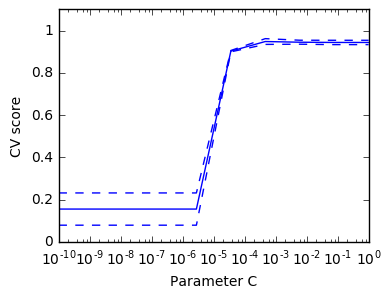

In [11]:
import numpy as np
from sklearn import cross_validation, datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

## Grid search

Note pour plus tard : Voir l'argument `cv`.  `GridSearch` fait 3-fold validation croisée pour la régression, stratified 3-fold pour un classificateur.

In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])
print(clf.best_score_)
print(clf.best_estimator_.C)

# Prediction performance on test set is not as good as on train set
print(clf.score(X_digits[1000:], y_digits[1000:]))

ImportError: No module named 'sklearn.model_selection'

# Pipelining

Grace à l'interface uniforme des classes estimateurs, nous avons la possibilité de créer des _pipelines_ : des composition de plusieurs estimateurs.

## Digits

Une première exemple d'un pipeline.

In [13]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

###############################################################################
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))


ImportError: No module named 'sklearn.model_selection'

## Eigenfaces

Une deuxième exemple d'un pipeline.

In [17]:
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
================== ============ ======= ========== =======

"""
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


###############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


###############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

ImportError: No module named 'sklearn.model_selection'